IMPORTS

In [1]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from dateutil.parser import parse
from dateutil import parser
import seaborn as sns
import networkx as nx
from collections import Counter
import networkx as nx
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx

import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

import networkx as nx
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import networkx as nx
import pandas as pd

Lendo dados para zonas

In [2]:
zones = pd.read_excel('data/coordsZonas.xlsx', index_col=0, engine='openpyxl')
columns_to_drop = [36, 41, 50, 52, 55, 53, 35, 54]

# Drop only existing columns
zones = zones.drop(columns=columns_to_drop, errors='ignore')
# 
# Drop rows with specified indexes
zones = zones.drop(index=columns_to_drop, errors='ignore')

zones

,Nome_ZT,XCOORD,YCOORD
ZTrafego,,,
1,Centro,-45.886701,-23.190638
2,Vila Maria e Vila Santa Luzia,-45.882070,-23.178009
3,Jardim Paulista e Monte Castelo,-45.873745,-23.182939
4,Vila So Pedro e Jardim Jussara,-45.869327,-23.188904
5,Vila Piratininga e Jardim Augusta,-45.880360,-23.195879
6,Vila Adyanna e Vila Betania,-45.892252,-23.203218
7,Vila Ema e Jardim Esplanada,-45.902175,-23.199704
8,Santana e Vila Rossi,-45.898069,-23.165302
9,Vila Industrial e VilaTatetuba,-45.857077,-23.180798


#### Reading Weekly Cases File 

In [3]:
cases = pd.read_csv('data/semanal_2015.csv', index_col=0)
cases

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
semana_epi,,,,,,,,,,,,,,,,,,,,,
1,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2.0,2.0,0.0,1.0,0.0,2.0,7.0,2.0,1.0,3.0,...,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0
5,7.0,7.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,...,0.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
6,8.0,6.0,6.0,8.0,2.0,0.0,2.0,1.0,2.0,4.0,...,0.0,3.0,5.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0
7,26.0,7.0,24.0,27.0,1.0,1.0,6.0,2.0,11.0,4.0,...,0.0,0.0,4.0,6.0,2.0,1.0,1.0,0.0,1.0,0.0
8,20.0,25.0,22.0,26.0,6.0,3.0,7.0,7.0,9.0,4.0,...,0.0,11.0,2.0,15.0,0.0,2.0,3.0,0.0,0.0,2.0
9,41.0,17.0,35.0,26.0,5.0,4.0,5.0,13.0,27.0,12.0,...,0.0,16.0,9.0,19.0,6.0,3.0,1.0,0.0,1.0,1.0


#### Aplicando Log no eixo y

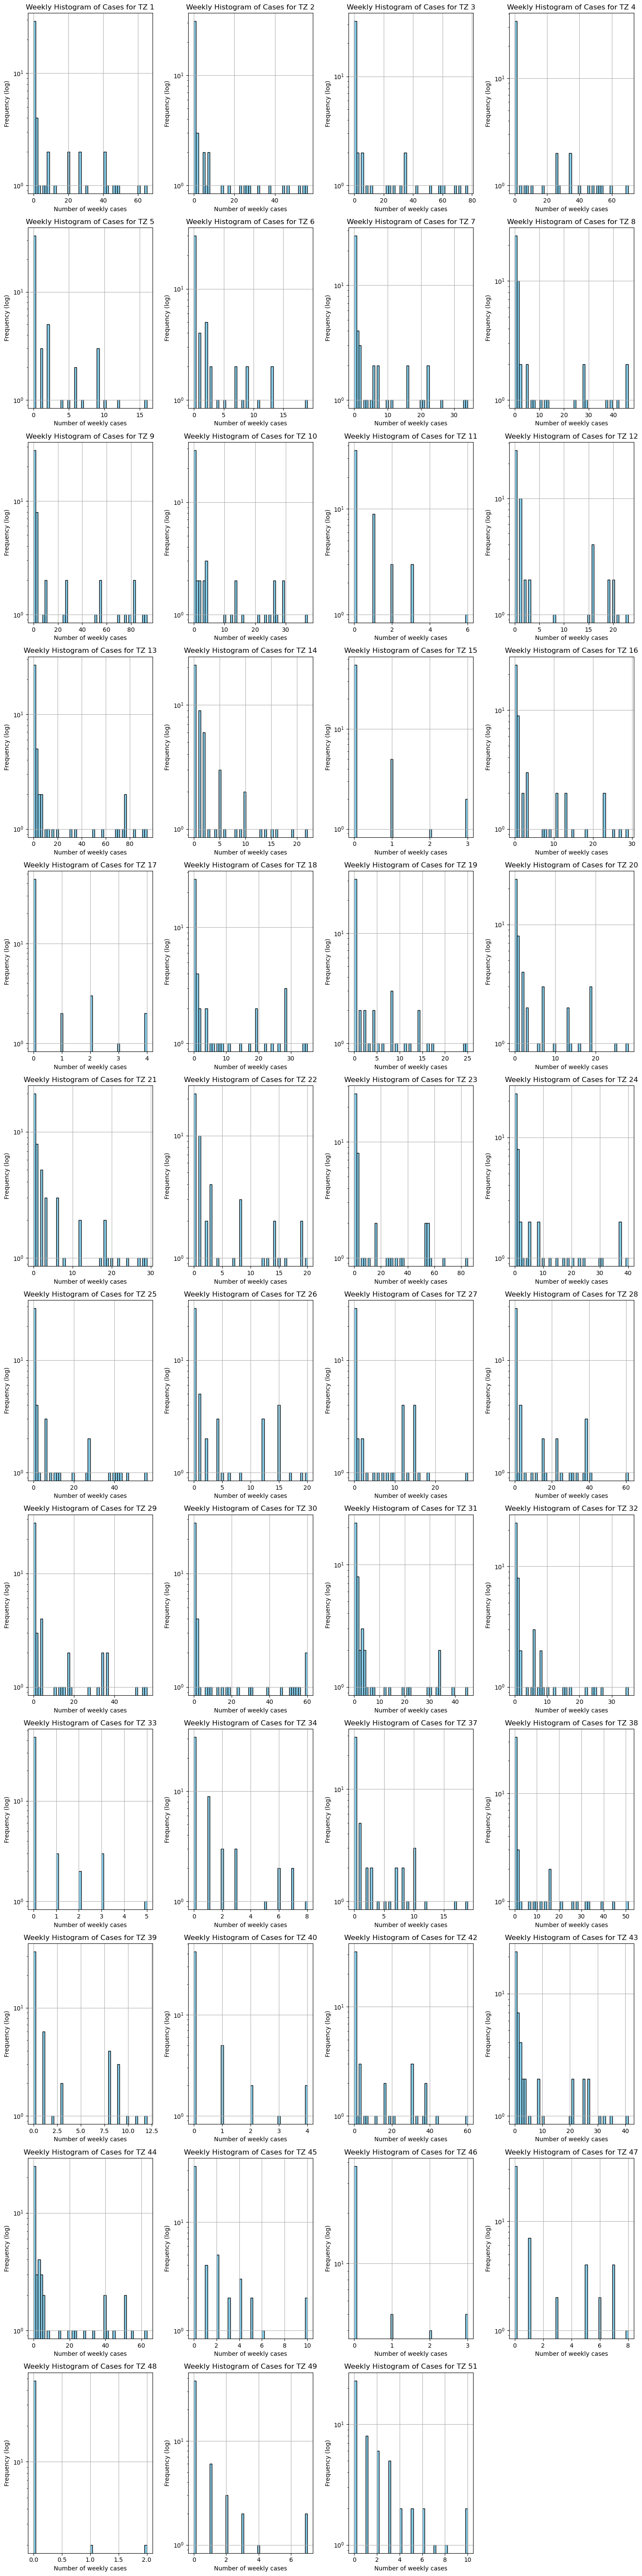

In [4]:
num_cols = 4 
num_rows = int(np.ceil(len(cases.columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, col in enumerate(cases.columns):
    ax = axes[i]
    ax.hist(cases[col], bins=50, edgecolor='black', color='skyblue')
    ax.set_xlabel('Number of weekly cases')
    ax.set_ylabel('Frequency (log)')
    ax.set_title(f'Weekly Histogram of Cases for TZ {col}')
    ax.grid(True)
    ax.set_yscale('log')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [5]:
zt_colors = {}
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Dark24
for i, zt in enumerate(cases.columns):
    zt_colors[zt] = colors[i % len(colors)] 

fig = go.Figure()

# Adding the Time Series
for zt in cases.columns:
    fig.add_trace(go.Scatter(x=cases.index, y=cases[zt], mode='lines', name=zt, line=dict(color=zt_colors[zt])))

fig.update_layout(
    title='Time Series of Weekly Cases by TZ',
    xaxis_title='Week',
    yaxis_title='Number of Weekly Cases',
    legend_title='TZ',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3, 
        xanchor='right',
        x=1
    ),
    height=600
)

fig.update_yaxes(type='log')
fig.show()


#### GENERATION OF GRAPHS FROM CALCULATED MUTUAL INFORMATION

In [6]:
mutual_inf_df = pd.read_csv('data/weeklycases_mutualinformation.csv', index_col=0)
mutual_inf_df.columns = mutual_inf_df.columns.astype(int)

mutual_inf_df

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
1,1.000000,0.915561,0.852961,0.845205,0.504902,0.353673,0.454567,0.447272,0.324617,0.389204,...,0.093685,0.371761,0.470987,0.575714,0.402525,0.127515,0.324857,0.044823,0.157964,0.011247
2,0.855820,1.000000,0.816266,0.810044,0.591783,0.511821,0.674157,0.506248,0.460986,0.590341,...,0.112519,0.724876,0.618403,0.761566,0.433293,0.284357,0.429887,0.086799,0.291890,0.145147
3,0.827143,0.850004,1.000000,0.911491,0.537721,0.594832,0.686363,0.464102,0.477419,0.596932,...,0.199794,0.741845,0.519398,0.484022,0.455567,0.274585,0.445253,0.226975,0.397856,0.058711
4,0.810248,0.813126,0.815265,1.000000,0.606866,0.445075,0.638938,0.551561,0.439129,0.540831,...,0.103024,0.627146,0.571720,0.618079,0.434137,0.185800,0.385993,0.088867,0.259641,0.034153
5,0.463006,0.610177,0.505758,0.591120,1.000000,0.456451,0.365466,0.410899,0.304448,0.428622,...,0.130592,0.481796,0.481195,0.536312,0.485323,0.324261,0.492115,0.096017,0.235977,0.118442
6,0.380114,0.555500,0.569064,0.481946,0.451104,1.000000,0.675864,0.715046,0.661928,0.541515,...,0.161628,0.712414,0.597872,0.654120,0.334152,0.171018,0.468947,0.087371,0.209336,0.198314
7,0.433415,0.708546,0.652932,0.701220,0.434843,0.635349,1.000000,0.737135,0.551324,0.626556,...,0.162803,0.726643,0.826364,0.666954,0.482536,0.186250,0.514354,0.107691,0.171735,0.112655
8,0.428865,0.516131,0.535067,0.579672,0.463167,0.710768,0.770959,1.000000,0.429065,0.603257,...,0.204720,0.644562,0.296594,0.565080,0.327087,0.121241,0.417401,0.173380,0.321170,0.065762
9,0.379778,0.539140,0.505416,0.451856,0.370925,0.709766,0.588461,0.445171,1.000000,0.738280,...,0.165593,0.662800,0.605838,0.628590,0.429671,0.154162,0.474166,0.170335,0.288005,0.035819
10,0.368464,0.595762,0.534337,0.574223,0.416014,0.553527,0.630693,0.627908,0.700557,1.000000,...,0.200948,0.702241,0.628159,0.652254,0.463881,0.138407,0.405337,0.094395,0.276226,0.038996


In [7]:
def save_adj_mtx_and_nodes(graph, mtx_filename, nodes_filename):
    nodes = list(graph.nodes())
    adj_mtx = nx.adjacency_matrix(graph, nodelist=nodes).todense()

    adj_mtx = (adj_mtx !=0).astype(int)

    np.savetxt(mtx_filename, adj_mtx, fmt = '%d')

    with open(nodes_filename, 'w') as f:
        for node in nodes:
            f.write(f'{node}\n')   

### THRESHOLD 1 - Any Non-Zero Value Generates an Edge

In [8]:
import pickle
def save_graph(graph, filename):
    with open(filename, 'wb') as f:
        pickle.dump(graph, f)

In [9]:
THRESHOLD_1 = 0
nodos = list(mutual_inf_df.index)

grafo = nx.Graph()
grafo.add_nodes_from(nodos)

for i in nodos:
    for j in nodos:
        if i < j:
            if mutual_inf_df.loc[i, j] >= THRESHOLD_1:
                grafo.add_edge(i, j, weight=mutual_inf_df.loc[i, j])
            else:
                print("Mutual Information Calculated Between ", i, j, mutual_inf_df.loc[i, j])

print(grafo)

save_adj_mtx_and_nodes(grafo, 'output/grafo1_dengue_mtx.txt', 'output/grafo1_dengue_nodes.txt')

Graph with 47 nodes and 1081 edges


#### Creating Similarity Matrices by Varying Thresholds

In [10]:
# Function to filter the adjacency matrix based on the threshold, converting values above the threshold to 1
def filter_adjacency_matrix(adj_matrix, threshold):
    binary_matrix = np.where(adj_matrix > threshold, 1, 0)
    return binary_matrix

# Function to Save the Adjacency Matrix with the Actual Values
def save_adj_mtx_with_actual_values(adj_matrix, threshold):
    mtx_filename = f'filtered_adj_matrix_threshold_{threshold:.2f}.txt'
    
    folder = 'output/mtx_dengue/'
    np.savetxt(folder+mtx_filename, adj_matrix, fmt='%d')
    print(f'Saved filtered adjacency matrix with threshold {threshold:.2f} to {mtx_filename}')

# Get the Adjacency Matrix of the Graph with Weights
adj_matrix = nx.to_numpy_array(grafo, weight='weight')

# Iterate Over Thresholds from 0 to 1 with Steps of 0.1
for threshold in np.arange(0, 1, 0.02):
    filtered_matrix = filter_adjacency_matrix(adj_matrix, threshold)
    if np.any(filtered_matrix):
        save_adj_mtx_with_actual_values(filtered_matrix, threshold)
    else:
        print(f'Matriz filtrada com limiar {threshold:.0f} só contém zeros. Interrompendo o loop...')
        break

Saved filtered adjacency matrix with threshold 0.00 to filtered_adj_matrix_threshold_0.00.txt
Saved filtered adjacency matrix with threshold 0.02 to filtered_adj_matrix_threshold_0.02.txt
Saved filtered adjacency matrix with threshold 0.04 to filtered_adj_matrix_threshold_0.04.txt
Saved filtered adjacency matrix with threshold 0.06 to filtered_adj_matrix_threshold_0.06.txt
Saved filtered adjacency matrix with threshold 0.08 to filtered_adj_matrix_threshold_0.08.txt
Saved filtered adjacency matrix with threshold 0.10 to filtered_adj_matrix_threshold_0.10.txt
Saved filtered adjacency matrix with threshold 0.12 to filtered_adj_matrix_threshold_0.12.txt
Saved filtered adjacency matrix with threshold 0.14 to filtered_adj_matrix_threshold_0.14.txt
Saved filtered adjacency matrix with threshold 0.16 to filtered_adj_matrix_threshold_0.16.txt
Saved filtered adjacency matrix with threshold 0.18 to filtered_adj_matrix_threshold_0.18.txt
Saved filtered adjacency matrix with threshold 0.20 to filte

Degree centrality

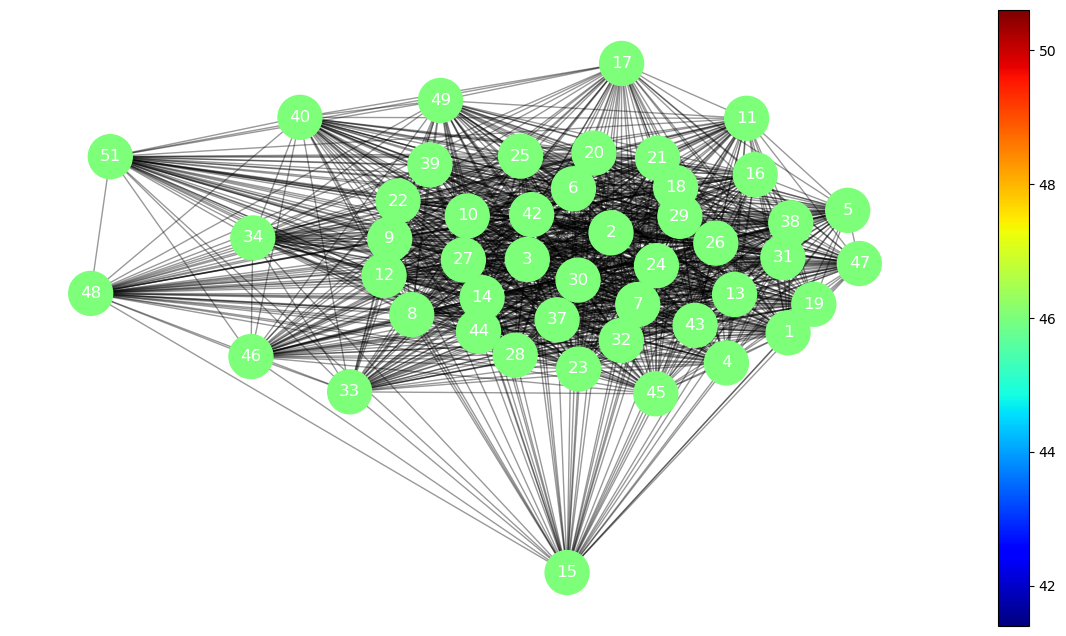

In [11]:

# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,8))

# layout position
pos = nx.spring_layout(grafo,seed=123456789,k=1)
# color of nodes
color = list(dict(nx.degree(grafo)).values())

# draw edges
nx.draw_networkx_edges(grafo,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(grafo,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(grafo, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

Graph with 47 nodes and 1081 edges


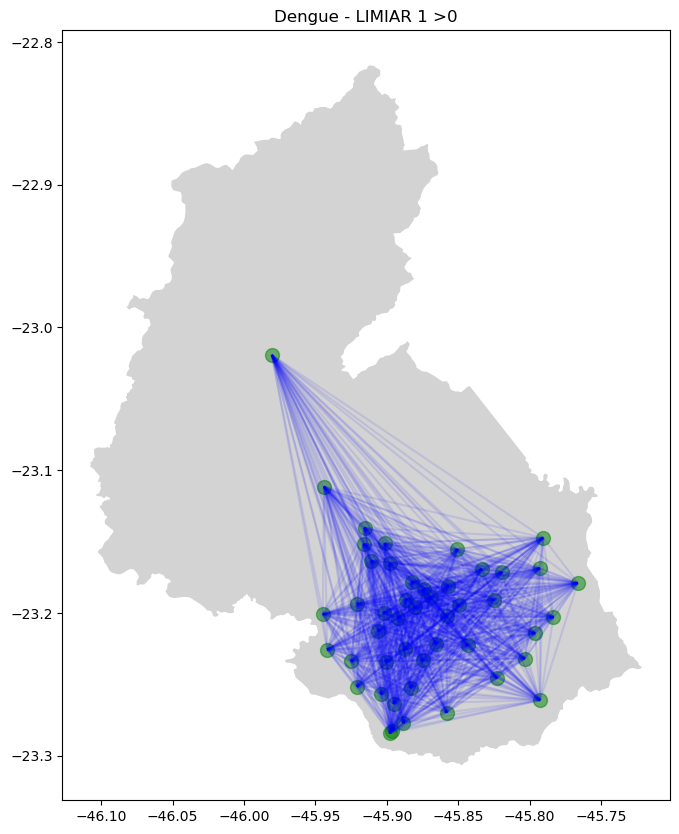

In [12]:
# Criar geometria dos pontos
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Criar GeoDataFrame dos nós
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

print(grafo)
# Criar lista de linhas para as arestas do grafo
lines = []
for edge in grafo.edges():
    start_node = edge[0]
    end_node = edge[1]

    # Verificar se os nós existem no DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'Um dos nos na aresta nao existe: {start_node} ou {end_node}')

# Criar GeoDataFrame das linhas
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')
# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot os pontos adicionais
gdf_zones.plot(ax=ax, color='green', alpha=0.5, markersize=100)

# Plot as linhas das arestas
gdf_lines.plot(ax=ax, color='blue', alpha=0.1, aspect='equal')

# Add title
plt.title(f'Dengue - LIMIAR 1 >{THRESHOLD_1}')

# Show the map
plt.show()


In [13]:
def calcula_metricas(grafo):
    total_graph = grafo.copy()
    
    # Check if the graph is connected and get the largest component
    if not nx.is_connected(grafo):
        print("Não é conectado")
        componentes = list(nx.connected_components(grafo))
        print(type(componentes))
        maior_componente = max(componentes, key=len)
        grafo = grafo.subgraph(maior_componente).copy()

    # Helper function to find all nodes with the maximum value
    def get_nodes_with_max_value(dictionary):
        print(dictionary)
        max_value = max(dictionary.values())
        return [(node,value) for node, value in dictionary.items() if value == max_value]
    
    # Calculate the measures in the largest component
    degree_dict = dict(nx.degree(grafo))
    grau_medio = sum(degree_dict.values()) / len(grafo)
    aglomeracao_dict = nx.clustering(grafo)
    aglomeracao_medio = nx.average_clustering(grafo)
    minimo_caminho_medio = nx.average_shortest_path_length(grafo)
    diametro = nx.diameter(grafo)
    betweenness_centrality = nx.betweenness_centrality(grafo)
    betweenness_medio = sum(betweenness_centrality.values()) / len(grafo)
    degree_centrality = nx.degree_centrality(grafo)
    
    # Find all nodes with maximum values in the measures
    maiores_graus = get_nodes_with_max_value(degree_dict)
    maiores_aglomeracao = get_nodes_with_max_value(aglomeracao_dict)
    maiores_degree_centrality = get_nodes_with_max_value(degree_centrality)
    maiores_betweenness_centrality = get_nodes_with_max_value(betweenness_centrality)
    
    # Metrics for the entire graph
    degree_dict_total = dict(nx.degree(total_graph))
    grau_medio_total = sum(degree_dict_total.values()) / len(total_graph)
    aglomeracao_dict_total = nx.clustering(total_graph)
    aglomeracao_media_total = nx.average_clustering(total_graph)
    betweenness_centrality_total = nx.betweenness_centrality(total_graph)
    betweenness_medio_total = sum(betweenness_centrality_total.values()) / len(total_graph)
    degree_centrality_total = nx.degree_centrality(total_graph)
    
    # Find all nodes with maximum values in the measures for the entire graph
    maiores_graus_total = get_nodes_with_max_value(degree_dict_total)
    maiores_aglomeracao_total = get_nodes_with_max_value(aglomeracao_dict_total)
    maiores_degree_centrality_total = get_nodes_with_max_value(degree_centrality_total)
    maiores_betweenness_centrality_total = get_nodes_with_max_value(betweenness_centrality_total)

    print('\nMETRICS FOR THE ENTIRE GRAPH')
    
    print(f'Number of nodes in the original graph: {total_graph.number_of_nodes()}')
    print(f'Number of edges in the original graph: {total_graph.number_of_edges()}')
    # Display measures for the entire graph
    print("Average Degree:", grau_medio_total)
    print("Average Clustering:", aglomeracao_media_total)
    print("Average Betweenness:", betweenness_medio_total)
    # Display nodes with the highest centrality indices
    print("\nNodes with highest degree:", maiores_graus_total)
    print("Nodes with highest clustering centrality:", maiores_aglomeracao_total)
    print("Nodes with highest degree centrality:", maiores_degree_centrality_total)
    print("Nodes with highest betweenness centrality:", maiores_betweenness_centrality_total)

    print('\nMETRICS FOR THE LARGEST COMPONENT OF THE GRAPH')
    # Display information about the largest component
    print("Number of nodes in the largest component:", grafo.number_of_nodes())
    print("Number of edges in the largest component:", grafo.number_of_edges())
    # Display the measures calculated for the largest component
    print("Average Degree:", grau_medio)
    print("Average Clustering:", aglomeracao_medio)
    print("Average Shortest Path:", minimo_caminho_medio)
    print("Diameter:", diametro)
    print("Average Betweenness:", betweenness_medio)

    # Display nodes with the highest centrality indices in the largest component
    print("\nNodes with highest degree in the largest component:", maiores_graus)
    print("Nodes with highest clustering centrality in the largest component:", maiores_aglomeracao)
    print("Nodes with highest degree centrality in the largest component:", maiores_degree_centrality)
    print("Nodes with highest betweenness centrality in the largest component:", maiores_betweenness_centrality)

In [14]:
def top_x_nodes_by_strength_and_centrality(G, top_x=10):
    # Calculate the strength (sum of edge weights) for each node
    strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

    # Calculate closeness centrality using the inverse of the edge weight
    for u, v, data in G.edges(data=True):
        data['inverse_weight'] = 1 / data['weight'] if data['weight'] != 0 else 0
    
    closeness_centrality = nx.closeness_centrality(G, distance='inverse_weight')

    # Calculate betweenness centrality using the inverse of the weight
    betweenness_centrality = nx.betweenness_centrality(G, weight='inverse_weight')

    # Calculate other centrality measures
    degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')

    # Calculate clustering coefficient for each node
    # clustering_coefficients = nx.clustering(G)
    clustering_coefficients = nx.clustering(G, weight='weight')

    def get_top_with_ties(metric_dict, top_x):
        sorted_nodes = sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)
        top_nodes = sorted_nodes[:top_x]
        
        if len(sorted_nodes) > top_x:
            cutoff_value = top_nodes[-1][1]
            for node, value in sorted_nodes[top_x:]:
                if value == cutoff_value:
                    top_nodes.append((node, value))
                else:
                    break
        return top_nodes

    # Sort nodes by different centralities
    top_strength_nodes = get_top_with_ties(strength, top_x)
    top_closeness_nodes = get_top_with_ties(closeness_centrality, top_x)
    top_betweenness_nodes = get_top_with_ties(betweenness_centrality, top_x)
    top_degree_nodes = get_top_with_ties(degree_centrality, top_x)
    top_eigenvector_nodes = get_top_with_ties(eigenvector_centrality, top_x)
    top_clustering_nodes = get_top_with_ties(clustering_coefficients, top_x)

    print(f"Top {top_x} nodes by strength based on edge weights:")
    for node, value in top_strength_nodes:
        print(f"{node} - {value:.2f}")

    print(f"\nTop {top_x} nodes by closeness centrality (inverse of weight):")
    for node, value in top_closeness_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by betweenness centrality (inverse of weight):")
    for node, value in top_betweenness_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by degree centrality:")
    for node, value in top_degree_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by eigenvector centrality:")
    for node, value in top_eigenvector_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by clustering coefficient:")
    for node, value in top_clustering_nodes:
        print(f"{node} - {value:.4f}")

In [15]:
calcula_metricas(grafo)

{1: 46, 2: 46, 3: 46, 4: 46, 5: 46, 6: 46, 7: 46, 8: 46, 9: 46, 10: 46, 11: 46, 12: 46, 13: 46, 14: 46, 15: 46, 16: 46, 17: 46, 18: 46, 19: 46, 20: 46, 21: 46, 22: 46, 23: 46, 24: 46, 25: 46, 26: 46, 27: 46, 28: 46, 29: 46, 30: 46, 31: 46, 32: 46, 33: 46, 34: 46, 37: 46, 38: 46, 39: 46, 40: 46, 42: 46, 43: 46, 44: 46, 45: 46, 46: 46, 47: 46, 48: 46, 49: 46, 51: 46}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 51: 1.0}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 

In [16]:
# top_nodes_analysis(grafo, 5)
top_x_nodes_by_strength_and_centrality(grafo)

Top 10 nodes by strength based on edge weights:
30 - 26.61
27 - 25.73
37 - 25.43
42 - 25.37
24 - 25.24
7 - 25.20
44 - 24.99
29 - 24.90
13 - 24.86
14 - 24.73

Top 10 nodes by closeness centrality (inverse of weight):
12 - 0.7221
15 - 0.7221
18 - 0.7221
20 - 0.7221
25 - 0.7221
31 - 0.7221
39 - 0.7221
40 - 0.7221
43 - 0.7221
48 - 0.7221

Top 10 nodes by betweenness centrality (inverse of weight):
15 - 25.2271
18 - 0.0648
20 - 0.0644
28 - 0.0609
43 - 0.0461
39 - 0.0408
31 - 0.0359
25 - 0.0292
12 - 0.0194
29 - 0.0186

Top 10 nodes by degree centrality:
1 - 1.0000
2 - 1.0000
3 - 1.0000
4 - 1.0000
5 - 1.0000
6 - 1.0000
7 - 1.0000
8 - 1.0000
9 - 1.0000
10 - 1.0000
11 - 1.0000
12 - 1.0000
13 - 1.0000
14 - 1.0000
15 - 1.0000
16 - 1.0000
17 - 1.0000
18 - 1.0000
19 - 1.0000
20 - 1.0000
21 - 1.0000
22 - 1.0000
23 - 1.0000
24 - 1.0000
25 - 1.0000
26 - 1.0000
27 - 1.0000
28 - 1.0000
29 - 1.0000
30 - 1.0000
31 - 1.0000
32 - 1.0000
33 - 1.0000
34 - 1.0000
37 - 1.0000
38 - 1.0000
39 - 1.0000
40 - 1.0000

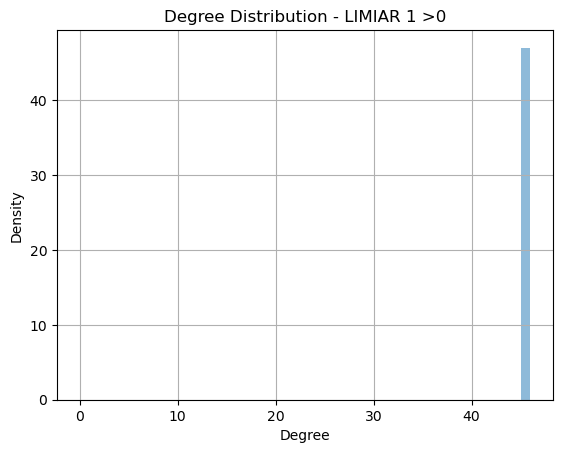

In [17]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 1 >{THRESHOLD_1}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

### THRESHOLD 2 - Percentile 5%

In [18]:
mutual_inf_df.stack()

1   1     1.000000
    2     0.915561
    3     0.852961
    4     0.845205
    5     0.504902
            ...   
51  46    0.135504
    47    0.291138
    48    0.057383
    49    0.085848
    51    1.000000
Length: 2209, dtype: float64

In [19]:
# Calculate the threshold based on the 5th percentile of the flows
threshold2 = mutual_inf_df.stack().quantile(0.95)
print(threshold2)

nodos = list(mutual_inf_df.index)

grafo2 = nx.Graph()
grafo2.add_nodes_from(nodos)

for i in nodos:
    for j in nodos:
        if i < j:
            if mutual_inf_df.loc[i, j] >= threshold2:
                grafo2.add_edge(i, j, weight=mutual_inf_df.loc[i, j])
            
print(grafo2)           
save_adj_mtx_and_nodes(grafo2, 'output/grafo2_dengue_mtx.txt', 'output/grafo2_dengue_nodes.txt')

0.8001414354322623
Graph with 47 nodes and 34 edges


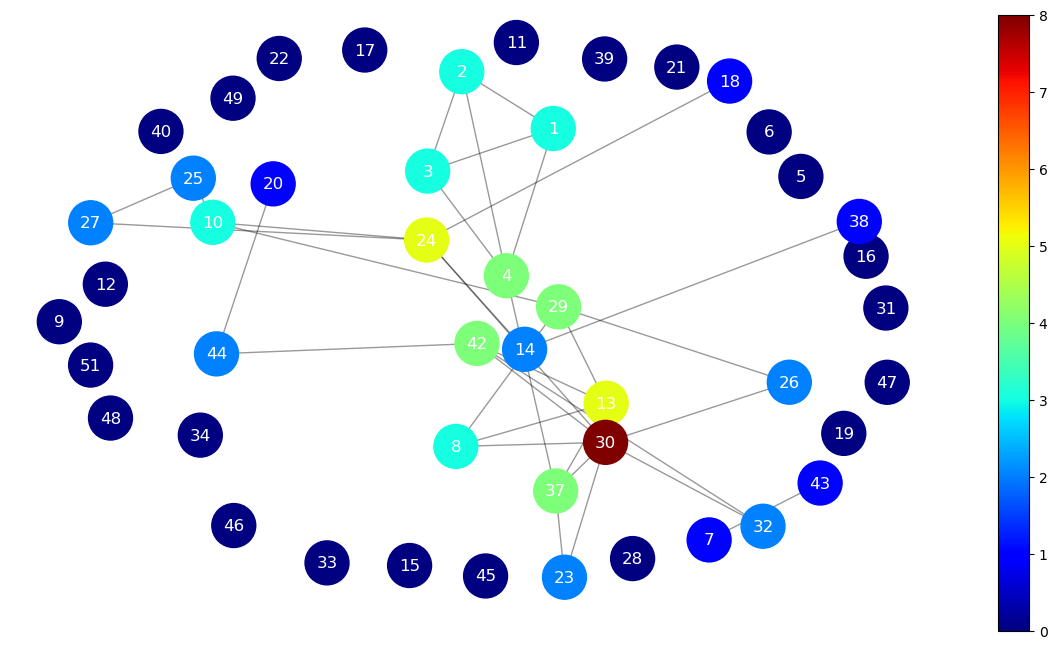

In [20]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,8))

# layout position
pos = nx.spring_layout(grafo2,seed=123456789,k=.9)
# color of nodes
color = list(dict(nx.degree(grafo2)).values())

# draw edges
nx.draw_networkx_edges(grafo2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(grafo2,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(grafo2, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
# plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

/var/folders/0p/5510gchj13qdnm063wyk5hsc0000gn/T/ipykernel_63684/2540094395.py:39: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



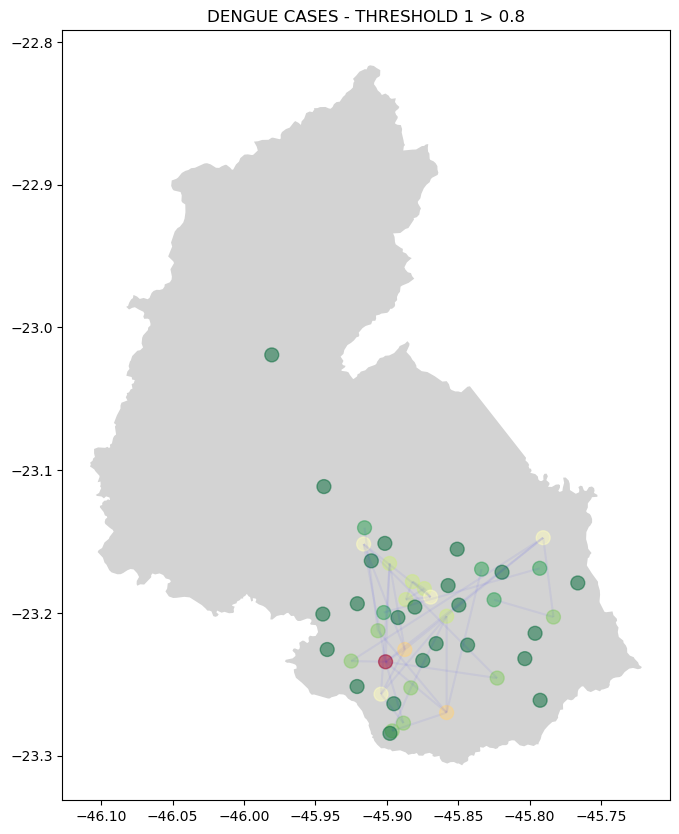

In [21]:
# Create geometry of points
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Create GeoDataFrame of nodes
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

# Create list of lines for the graph edges
lines = []
for edge in grafo2.edges():
    # print('Edges')
    start_node = edge[0]
    end_node = edge[1]

    # Check if the nodes exist in the DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'One of the nodes in the edge does not exist: {start_node} or {end_node}')

# Create GeoDataFrame for the lines
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

# Calculate the degree of each node
degree_dict = dict(grafo2.degree())

# Add the 'degree' column to gdf_zones
gdf_zones['grau'] = gdf_zones.index.map(degree_dict)

# Normalize the degrees to the range [0, 1]
max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())

gdf_zones['grau_normalizado'] = gdf_zones['grau'].apply(lambda x: (x - min_degree) / (max_degree - min_degree))

# Define the colormap (green -> red)
colormap = cm.get_cmap('RdYlGn_r')

# Map the normalized values to colors
gdf_zones['color'] = gdf_zones['grau_normalizado'].apply(lambda x: mcolors.to_hex(colormap(x)))

# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot the points with colors based on degree
gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, markersize=100)

# Plot the edge lines
gdf_lines.plot(ax=ax, color='blue', alpha=0.05, aspect='equal')

# Add title
# plt.title(f'Dengue - THRESHOLD 1 > {threshold2}')
plt.title(f'DENGUE CASES - THRESHOLD 1 > {round(threshold2, 3)}')

# Show the map
plt.show()


In [22]:
print(grafo2)

Graph with 47 nodes and 34 edges


In [23]:
calcula_metricas(grafo2)

Não é conectado
<class 'list'>
{1: 3, 2: 3, 3: 3, 4: 4, 8: 3, 10: 3, 13: 5, 14: 2, 18: 1, 20: 1, 23: 2, 24: 5, 25: 2, 26: 2, 27: 2, 29: 4, 30: 8, 32: 2, 37: 4, 38: 1, 42: 4, 44: 2}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 0.5, 8: 0.6666666666666666, 10: 0, 13: 0.4, 14: 0, 18: 0, 20: 0, 23: 1.0, 24: 0, 25: 0, 26: 0, 27: 0, 29: 0.16666666666666666, 30: 0.17857142857142858, 32: 1.0, 37: 0.3333333333333333, 38: 0, 42: 0.3333333333333333, 44: 0}
{1: 0.14285714285714285, 2: 0.14285714285714285, 3: 0.14285714285714285, 4: 0.19047619047619047, 8: 0.14285714285714285, 10: 0.14285714285714285, 13: 0.23809523809523808, 14: 0.09523809523809523, 18: 0.047619047619047616, 20: 0.047619047619047616, 23: 0.09523809523809523, 24: 0.23809523809523808, 25: 0.09523809523809523, 26: 0.09523809523809523, 27: 0.09523809523809523, 29: 0.19047619047619047, 30: 0.38095238095238093, 32: 0.09523809523809523, 37: 0.19047619047619047, 38: 0.047619047619047616, 42: 0.19047619047619047, 44: 0.09523809523809523}
{1: 0.0, 2: 0.0, 3:

In [24]:
# top_nodes_analysis(grafo2, 5)
top_x_nodes_by_strength_and_centrality(grafo2)

Top 10 nodes by strength based on edge weights:
30 - 6.74
13 - 4.28
24 - 4.14
4 - 3.37
42 - 3.34
29 - 3.32
37 - 3.30
1 - 2.61
3 - 2.58
2 - 2.54

Top 10 nodes by closeness centrality (inverse of weight):
30 - 0.1998
13 - 0.1724
24 - 0.1695
37 - 0.1630
42 - 0.1510
8 - 0.1469
23 - 0.1463
29 - 0.1455
26 - 0.1422
32 - 0.1392

Top 10 nodes by betweenness centrality (inverse of weight):
30 - 0.1072
24 - 0.0850
37 - 0.0657
4 - 0.0522
42 - 0.0367
13 - 0.0338
14 - 0.0193
44 - 0.0193
10 - 0.0116
27 - 0.0116
29 - 0.0116

Top 10 nodes by degree centrality:
30 - 0.1739
13 - 0.1087
24 - 0.1087
4 - 0.0870
29 - 0.0870
37 - 0.0870
42 - 0.0870
1 - 0.0652
2 - 0.0652
3 - 0.0652
8 - 0.0652
10 - 0.0652

Top 10 nodes by eigenvector centrality:
30 - 0.5253
13 - 0.4245
37 - 0.3078
42 - 0.3003
8 - 0.2974
29 - 0.2498
23 - 0.2079
32 - 0.1957
24 - 0.1929
26 - 0.1884

Top 10 nodes by clustering coefficient:
1 - 0.9414
3 - 0.9374
2 - 0.9325
23 - 0.9259
32 - 0.8820
8 - 0.6194
4 - 0.4678
13 - 0.3733
37 - 0.3086
42 - 0.

In [25]:
save_graph(grafo2, "grafo2_dengue.pkl")

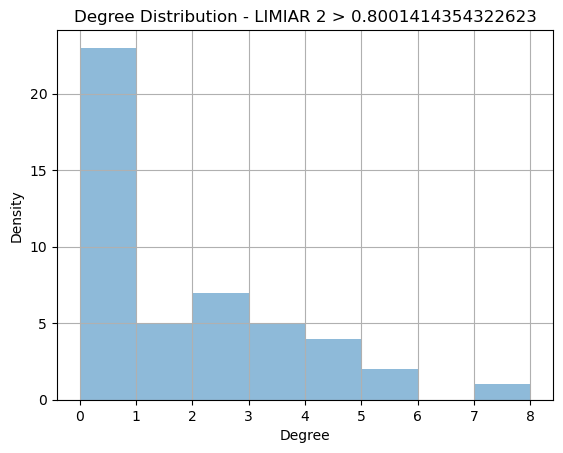

In [26]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo2.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 2 > {threshold2}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

#### THRESHOLD 3 - Maximum Diameter Threshold  

We Did Not Consider Only the Connected Component

In [27]:
# Rebuilding the graph with all connections where the correlation is above 0
nodos = list(mutual_inf_df.index)

grafo = nx.Graph()
grafo.add_nodes_from(nodos)

for i in nodos:
    for j in nodos:
        if i < j:
            if mutual_inf_df.loc[i, j] >= 0:
                grafo.add_edge(i, j, weight=mutual_inf_df.loc[i, j])

print(len(grafo.edges))                     

1081


In [28]:
print(grafo)

Graph with 47 nodes and 1081 edges


In [29]:
import networkx as nx

def find_max_diameter_graph(original_graph):
    max_diameter = -1
    max_diameter_graph = None
    min_threshold = 10000000
    max_graph = None
    final_graph = None
    
    # Determine the list of thresholds based on the edge weights, sorted from highest to lowest
    thresholds = sorted(set(weight for u, v, weight in original_graph.edges(data='weight')), reverse=True)
    print(thresholds)
    
    # Iterate over the thresholds
    for threshold in thresholds:
        # Create a copy of the original graph
        graph_copy = original_graph.copy()
        
        # Remove edges with weights below the threshold
        edges_to_remove = [(u, v) for u, v, weight in original_graph.edges(data='weight') if weight < threshold]
        graph_copy.remove_edges_from(edges_to_remove)
        
        # Find the largest connected component
        largest_connected_component = max(nx.connected_components(graph_copy), key=len)
        
        # Create a subgraph with only the largest connected component
        subgraph = graph_copy.subgraph(largest_connected_component)
        
        # Calculate the diameter of the subgraph
        diameter = nx.diameter(subgraph)
        
        # Check if the diameter is greater than the maximum found so far
        if diameter >= max_diameter:
            max_diameter = diameter
            max_diameter_graph = subgraph
            min_threshold = threshold
            max_graph = graph_copy
                 
    return max_graph, max_diameter_graph, max_diameter, min_threshold

# Example usage:
# Suppose 'grafo' is your original graph
grafo4, max_diameter_graph, diameter, threshold = find_max_diameter_graph(grafo)
# nx.write_adjlist(grafo4,'grafo3_dengue.adjlist')
save_adj_mtx_and_nodes(grafo4, 'output/grafo3_dengue_mtx.txt', 'output/grafo3_dengue_nodes.txt')


[0.9155611725488946, 0.9114911879682492, 0.9095269100561936, 0.895244287949013, 0.8703856811584947, 0.869824075151179, 0.8636411837169753, 0.8559682522477543, 0.8529610328457329, 0.8498619141791091, 0.8458607083917331, 0.8452047245712775, 0.8377719360942093, 0.8356603256099984, 0.8346698212531767, 0.8339205519800226, 0.8327403335678931, 0.8291735732085685, 0.828669187705839, 0.826363560493383, 0.8245805186775481, 0.82277920094348, 0.8207385704634811, 0.8193984870500097, 0.818824117118107, 0.818813024425721, 0.8162656181031807, 0.8157215540856693, 0.814186692759197, 0.8100444512293352, 0.8056904382930612, 0.8026534067482243, 0.8023657539437794, 0.8016166071027382, 0.7976399740957896, 0.7955152072335485, 0.7950651121597887, 0.7950250345065717, 0.7949173155500449, 0.7883820212170092, 0.7867239693016919, 0.7840005400714807, 0.7832458077776734, 0.7823875762540919, 0.7818436194649259, 0.7815652452017212, 0.7811539506188341, 0.7799989642486058, 0.7783476513360559, 0.7710365815497462, 0.770524

In [30]:
print(grafo4)

Graph with 47 nodes and 30 edges


In [31]:
print(max_diameter_graph)

Graph with 18 nodes and 23 edges


In [32]:
print('Max Diameter: ', diameter)

Max Diameter:  7


In [33]:
print('Min Threshold: ', threshold)

Min Threshold:  0.8100444512293352


In [34]:
# Iterar sobre as arestas e imprimir o peso de cada uma
for u, v, weight in grafo4.edges(data='weight'):
    print(f"Edges ({u}, {v}) with weights: {weight}")

Edges (1, 2) with weights: 0.9155611725488946
Edges (1, 3) with weights: 0.8529610328457329
Edges (1, 4) with weights: 0.8452047245712775
Edges (2, 3) with weights: 0.8162656181031807
Edges (2, 4) with weights: 0.8100444512293352
Edges (3, 4) with weights: 0.9114911879682492
Edges (7, 43) with weights: 0.826363560493383
Edges (8, 13) with weights: 0.8327403335678931
Edges (8, 29) with weights: 0.82277920094348
Edges (8, 30) with weights: 0.869824075151179
Edges (10, 24) with weights: 0.8245805186775481
Edges (10, 25) with weights: 0.818813024425721
Edges (10, 29) with weights: 0.8207385704634811
Edges (13, 29) with weights: 0.8377719360942093
Edges (13, 30) with weights: 0.9095269100561936
Edges (13, 42) with weights: 0.895244287949013
Edges (14, 24) with weights: 0.8193984870500097
Edges (14, 38) with weights: 0.8703856811584947
Edges (18, 24) with weights: 0.8157215540856693
Edges (20, 44) with weights: 0.8559682522477543
Edges (23, 30) with weights: 0.8458607083917331
Edges (23, 37)

In [35]:
# Check other connected components in max_graph
other_components = [comp for comp in nx.connected_components(grafo4) if len(comp) > 1 and comp != set(max_diameter_graph.nodes)]

# Print information about other connected components
if other_components:
    print("Other connected components with more than one node:")
    for comp in other_components:
        print(f"Component: {comp} - Number of nodes: {len(comp)}")
else:
    print("There are no other connected components with more than one node.")

Other connected components with more than one node:
Component: {1, 2, 3, 4} - Number of nodes: 4
Component: {43, 7} - Number of nodes: 2


Filtered edges: [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (7, 43), (8, 13), (8, 29), (8, 30), (10, 24), (10, 25), (10, 29), (13, 29), (13, 30), (13, 42), (14, 24), (14, 38), (18, 24), (20, 44), (23, 30), (23, 37), (24, 27), (24, 30), (25, 27), (26, 29), (26, 30), (30, 32), (30, 37), (42, 44)]


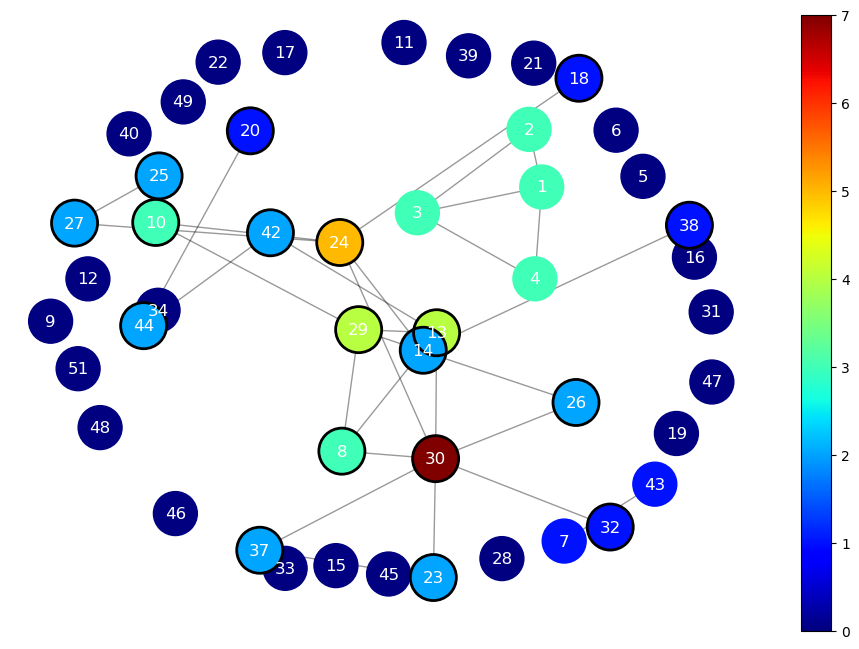

In [36]:
# Function to show the graph with highlighted nodes from the largest connected component
def show_graph_with_highlighted_nodes(graph, max_diameter_graph, threshold):
    # Figure setup
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Layout for node positioning
    pos = nx.spring_layout(graph, seed=123456789, k=0.9)

    # Node colors based on graph degree
    color = [dict(nx.degree(graph)).get(node, 0) for node in graph.nodes()]

    # Filter edges with weight less than the threshold
    edges_to_draw = [(u, v) for u, v, weight in graph.edges(data='weight') if weight > threshold]
    print(f'Filtered edges: {edges_to_draw}')

    # Draw the filtered edges
    nx.draw_networkx_edges(graph,
                           edgelist=edges_to_draw,
                           pos=pos,
                           alpha=0.4, ax=ax)

    # Draw all nodes
    nodes = nx.draw_networkx_nodes(graph,
                                   pos=pos,
                                   node_size=1000,
                                   node_color=color,
                                   cmap=plt.cm.jet, ax=ax)

    # Add border to the nodes that are part of max_diameter_graph
    nx.draw_networkx_nodes(graph,
                           pos=pos,
                           nodelist=max_diameter_graph.nodes(),
                           node_size=1100,
                           edgecolors='black',
                           node_color='none',
                           linewidths=2, ax=ax)

    # Draw node labels
    nx.draw_networkx_labels(graph, pos=pos,
                            font_color='white', ax=ax)

    plt.axis("off")
    plt.colorbar(nodes)
    plt.show()

show_graph_with_highlighted_nodes(grafo4, max_diameter_graph, threshold=threshold)


/var/folders/0p/5510gchj13qdnm063wyk5hsc0000gn/T/ipykernel_63684/639155095.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



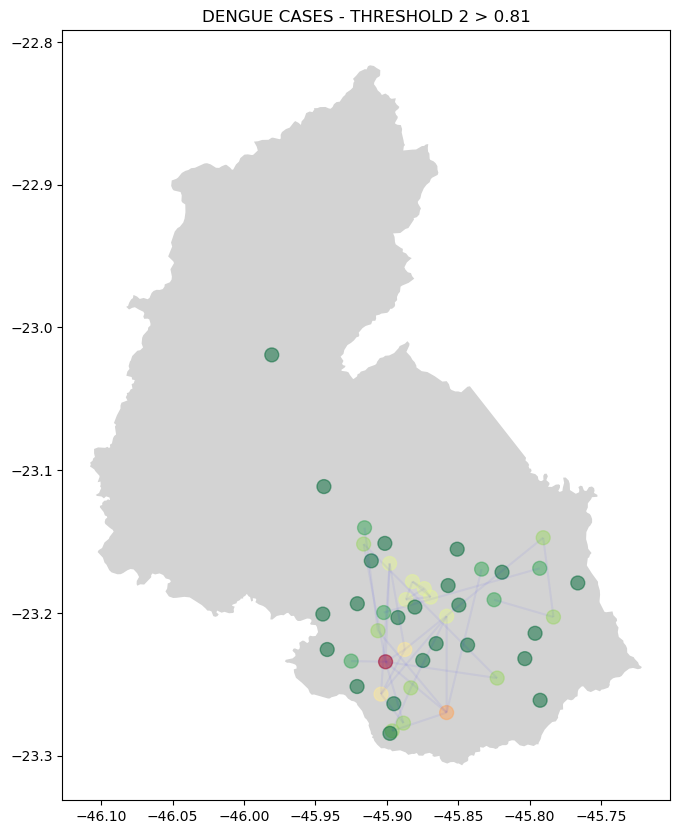

In [37]:
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')
lines = []
for edge in grafo4.edges():
    start_node = edge[0]
    end_node = edge[1]

    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'Um dos nos na aresta nao existe: {start_node} ou {end_node}')

gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

degree_dict = dict(grafo4.degree())

gdf_zones['grau'] = gdf_zones.index.map(degree_dict)

max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())

gdf_zones['grau_normalizado'] = gdf_zones['grau'].apply(lambda x: (x - min_degree) / (max_degree - min_degree))

colormap = cm.get_cmap('RdYlGn_r')

gdf_zones['color'] = gdf_zones['grau_normalizado'].apply(lambda x: mcolors.to_hex(colormap(x)))

sjc = gpd.read_file('data/map.geojson')

ax = sjc.plot(figsize=(10, 10), color='lightgrey')

gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, markersize=100)

gdf_lines.plot(ax=ax, color='blue', alpha=0.05, aspect='equal')

plt.title(f'DENGUE CASES - THRESHOLD 2 > {round(threshold, 3)}')
plt.show()

In [38]:
print(grafo4)

Graph with 47 nodes and 30 edges


In [39]:
calcula_metricas(grafo4)

Não é conectado
<class 'list'>
{32: 1, 37: 2, 38: 1, 8: 3, 42: 2, 10: 3, 44: 2, 13: 4, 14: 2, 18: 1, 20: 1, 23: 2, 24: 5, 25: 2, 26: 2, 27: 2, 29: 4, 30: 7}
{32: 0, 37: 1.0, 38: 0, 8: 0.6666666666666666, 42: 0, 10: 0, 44: 0, 13: 0.3333333333333333, 14: 0, 18: 0, 20: 0, 23: 1.0, 24: 0, 25: 0, 26: 0, 27: 0, 29: 0.16666666666666666, 30: 0.09523809523809523}
{32: 0.058823529411764705, 37: 0.11764705882352941, 38: 0.058823529411764705, 8: 0.1764705882352941, 42: 0.11764705882352941, 10: 0.1764705882352941, 44: 0.11764705882352941, 13: 0.23529411764705882, 14: 0.11764705882352941, 18: 0.058823529411764705, 20: 0.058823529411764705, 23: 0.11764705882352941, 24: 0.29411764705882354, 25: 0.11764705882352941, 26: 0.11764705882352941, 27: 0.11764705882352941, 29: 0.23529411764705882, 30: 0.4117647058823529}
{32: 0.0, 37: 0.0, 38: 0.0, 8: 0.00980392156862745, 42: 0.22058823529411764, 10: 0.11764705882352941, 44: 0.11764705882352941, 13: 0.31862745098039214, 14: 0.11764705882352941, 18: 0.0, 20: 0.

In [40]:
# top_nodes_analysis(grafo4, 5)
top_x_nodes_by_strength_and_centrality(grafo4)

Top 10 nodes by strength based on edge weights:
30 - 5.93
24 - 4.14
13 - 3.48
29 - 3.32
1 - 2.61
3 - 2.58
4 - 2.57
2 - 2.54
8 - 2.53
10 - 2.46

Top 10 nodes by closeness centrality (inverse of weight):
30 - 0.1670
24 - 0.1519
13 - 0.1455
8 - 0.1327
29 - 0.1290
10 - 0.1277
26 - 0.1203
23 - 0.1136
37 - 0.1130
42 - 0.1110

Top 10 nodes by betweenness centrality (inverse of weight):
30 - 0.0763
24 - 0.0618
13 - 0.0444
42 - 0.0290
14 - 0.0155
44 - 0.0155
10 - 0.0116
29 - 0.0116
27 - 0.0077
1 - 0.0000
2 - 0.0000
3 - 0.0000
4 - 0.0000
5 - 0.0000
6 - 0.0000
7 - 0.0000
8 - 0.0000
9 - 0.0000
11 - 0.0000
12 - 0.0000
15 - 0.0000
16 - 0.0000
17 - 0.0000
18 - 0.0000
19 - 0.0000
20 - 0.0000
21 - 0.0000
22 - 0.0000
23 - 0.0000
25 - 0.0000
26 - 0.0000
28 - 0.0000
31 - 0.0000
32 - 0.0000
33 - 0.0000
34 - 0.0000
37 - 0.0000
38 - 0.0000
39 - 0.0000
40 - 0.0000
43 - 0.0000
45 - 0.0000
46 - 0.0000
47 - 0.0000
48 - 0.0000
49 - 0.0000
51 - 0.0000

Top 10 nodes by degree centrality:
30 - 0.1522
24 - 0.1087
13 

In [41]:
save_graph(grafo4, "grafo4_dengue.pkl")

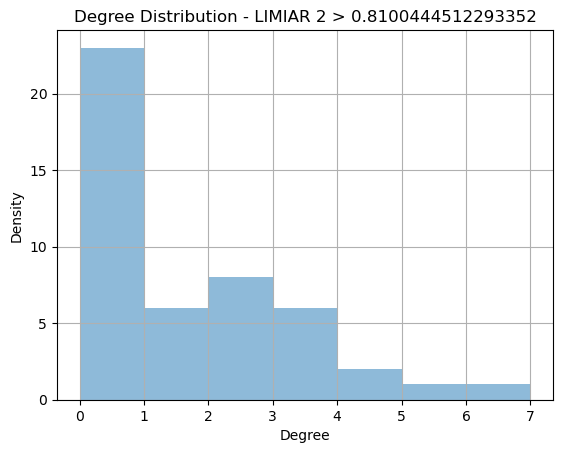

In [42]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo4.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 2 > {threshold}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

Calculating metrics

In [1]:
import pickle

def load_graph(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# Substitua pelos caminhos corretos dos seus arquivos .pkl
graphs = {
    # "Mob. S1": load_graph("mob_s1.pkl"),
    # "Mob. S2": load_graph("mob_s2.pkl"),
    # "Mob. S3": load_graph("mob_s3.pkl"), 
    "Dengue S2": load_graph("grafo2_dengue.pkl"),
    "Dengue S3": load_graph("grafo4_dengue.pkl"),
}

In [2]:
import networkx as nx

def calculate_metrics(G):
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    avg_degree = sum(dict(G.degree()).values()) / n_nodes

    # Diâmetro da maior componente conexa
    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        diameter = nx.diameter(subgraph)

    clustering = nx.average_clustering(G)
    n_components = nx.number_connected_components(G)

    return {
        "Edges": n_edges,
        "Density": round(density, 4),
        "Avg. Degree": round(avg_degree, 2),
        "Diameter": diameter,
        "Clustering": round(clustering, 4),
        "Components": n_components,
    }


In [3]:
import pandas as pd

results = {}
for name, G in graphs.items():
    results[name] = calculate_metrics(G)

df_metrics = pd.DataFrame(results).T
print(df_metrics)


           Edges  Density  Avg. Degree  Diameter  Clustering  Components
Dengue S2   34.0   0.0315         1.45       6.0      0.1612        25.0
Dengue S3   30.0   0.0278         1.28       7.0      0.1545        26.0


In [4]:
latex_table = df_metrics.to_latex(
    index=True,
    column_format='lcccccc',
    caption="Summary of network metrics for mobility and dengue case networks constructed under different thresholding criteria.",
    label="tab:threshold_summary"
)
print(latex_table)


\begin{table}
\caption{Summary of network metrics for mobility and dengue case networks constructed under different thresholding criteria.}
\label{tab:threshold_summary}
\begin{tabular}{lcccccc}
\toprule
 & Edges & Density & Avg. Degree & Diameter & Clustering & Components \\
\midrule
Dengue S2 & 34.000000 & 0.031500 & 1.450000 & 6.000000 & 0.161200 & 25.000000 \\
Dengue S3 & 30.000000 & 0.027800 & 1.280000 & 7.000000 & 0.154500 & 26.000000 \\
\bottomrule
\end{tabular}
\end{table}

